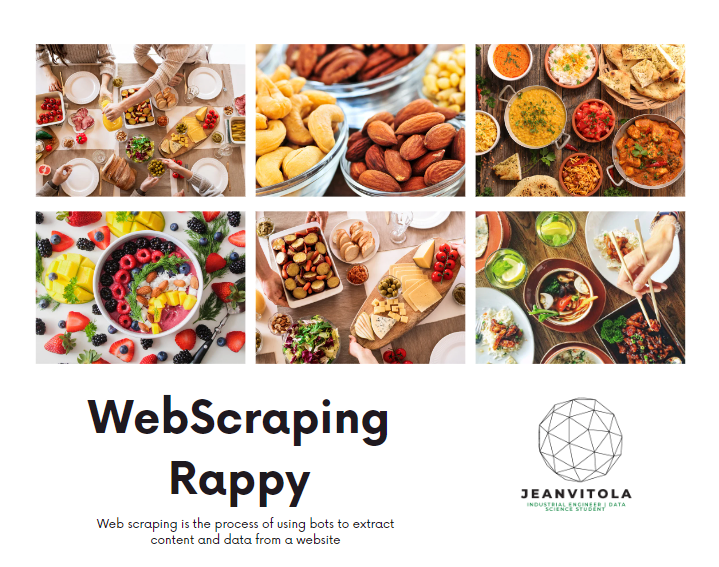

In [3]:
#-------- modules/libraries----------
from selenium import webdriver  
import os
import time
from bs4 import BeautifulSoup
import pandas as pd
import warnings  
warnings.filterwarnings('ignore')
from selenium.webdriver.common.keys import Keys


#------Webdriver config------------------
class rappy_web(webdriver.Chrome):
    def __init__(self,driver_path=os.pathsep + r'C:\SeleniumDrivers', teardown=False):
        self.driver_path=driver_path
        self.teardown=teardown
        os.environ["PATH"] += self.driver_path
        options = webdriver.ChromeOptions()
        options.add_experimental_option('excludeSwitches', ['enable-logging'])    #Evitar adverntencias del desarrollo   
        super(rappy_web,self).__init__(options=options)
        self.implicitly_wait(10) 
        self.maximize_window() 
        
        
    def __exit__(self,exc_type,exc_value,exc_tb):
        if self.teardown:
            self.quit()

    #//  URL 
    def page_rappi(self):
        self.get("https://www.rappi.com.co/")
    
     
#--------Select city-----------------------#
    def ubication_rappy(self):
        ubication_element=self.find_element_by_xpath('//*[@id="input_box_address_capture"]/div/input')
        ubication_element.clear
        ubication_element.send_keys("Cartagena")
        time.sleep(2)
        ubication_element.send_keys(Keys.ARROW_DOWN)
        time.sleep(2)
        ubication_element.send_keys(Keys.ENTER)
    
#------------ restaurant--------------------#
    def restaurant_rappy(self):
        select_restaurant=self.find_element_by_xpath('//*[@id="__next"]/div[3]/div[2]/div/div[2]/div/div/div[1]/div/div/a')
        self.execute_script("arguments[0].click();", select_restaurant)

#------------Scrolling page-----------------#
    def scrolling_page(self):
        for i in range(5): 
            self.execute_script("window.scrollBy(0, 250)")
            time.sleep(1)
        
    def watch_more(self):
        button=self.find_element_by_xpath('//*[@id="__next"]/div[3]/div[3]/div[3]/div[3]/button')
        self.execute_script("arguments[0].click();", button)  
        
#---------Parser_elements--------------------#

    def parsing_elements(self):
        list_restaurant=self.find_elements_by_class_name("cvItem")
        
        #name_restaurant
        name=[(i.find_element_by_class_name("restaurant-name").text) for i in list_restaurant]
        print("name successful")
        
        #class_food
        name_food=[(i.find_element_by_class_name("food-name").text) for i in list_restaurant]
        print("name_food successful")
        
        #delivery_time
        delivery_time=[(i.find_element_by_class_name("time-text").text) for i in list_restaurant]
        print("delivery_time successful")
        
        #rating
        rating=[(i.find_element_by_class_name("review-text").text) for i in list_restaurant]
        print("rating successful")
        
        #href
        href=self.find_elements_by_xpath('//*[@role="link"]')
        href_foods=[]
        for i in href:
            href_foods.append((i.get_attribute('href')))
            
#         href=self.find_elements_by_xpath('//*[@role="link"]')
#         href_foods=[(i.get_attribute('href') for i in href)]
       
        
        a={"name":name,"name_food":name_food,"rating":rating,"delivery_time":delivery_time,"href_foods":href_foods}
        df = pd.DataFrame.from_dict(a, orient='index')
        df = df.transpose()
        df
        df.to_excel("rappy_junio.xlsx", index=False)  
    




In [4]:
with rappy_web() as bot:
    bot.page_rappi()
    time.sleep(1)
    bot.ubication_rappy()
    time.sleep(2)
    bot.restaurant_rappy()
    bot.scrolling_page()
    time.sleep(2)
    bot.watch_more()
    time.sleep(2)
    bot.parsing_elements()

name successful
name_food successful
delivery_time successful
rating successful
